adult 테스트셋 분류 정확도 95% 의 모델을 찾으세요

- 인구조사 대상의 연간수입이 5천만원 이상인지를 분류하는 문제입니다
- training 데이터셋으로만 모델을 학습시켜야 합니다

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df_train = pd.read_csv('adult.data', header=None)
df_train.shape

(32561, 15)

In [44]:
# 테스트 데이터 파일에 문제가 있어서 메모장으로 열어서 첫줄을 지웠습니다.
df_test = pd.read_csv('adult.test', header=None)
df_test.shape

(16281, 15)

In [47]:
# 학습/테스트 데이터를 합쳐서 전처리를 합니다
df = pd.concat((df_train, df_test))
df.shape

(48842, 15)

In [48]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [49]:
#컬럼이름을 알기 쉽게 바꿔줍니다
col = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df.columns = col
len(col)

15

In [58]:
df.iloc[:, -1].unique()

array([' <=50K', ' >50K', ' >50K.'], dtype=object)

In [63]:
# income 값에 . 이 붙어 있어서 지워줍니다
df = df.replace(' <=50K.', ' <=50K', regex=True)
df = df.replace(' >50K.', ' >50K', regex=True)

In [60]:
df.iloc[:, -1].unique()

array([' <=50K', ' >50K'], dtype=object)

In [66]:
df_hot = pd.get_dummies(df)

In [106]:
df_hot.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia',
       'income_ <=50K', 'income_ >50K'],
      dtype='object', length=110)

In [65]:
#맨 뒤의 컬럼은 사용하지 않습니다
y = df_hot['income_ <=50K']
X = df_hot.iloc[:, :-2]
X.shape, y.shape

((48842, 108), (48842,))

In [84]:
X_norm = (X - np.min(X, axis=0))/(np.max(X, axis=0) - np.min(X, axis=0)) #정규화 [0, 1]

In [79]:
m_train = len(df_train)
X_train = X_norm[:m_train]
X_test = X_norm[m_train:]
y_train = y[:m_train]
y_test = y[m_train:]

In [90]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8520929946868954, 0.8520361157177078)

In [98]:
s = pd.DataFrame(model.feature_importances_,X.columns)

In [102]:
s.head(7)

,0
age,0.011760
fnlwgt,0.001722
education-num,0.233963
capital-gain,0.217871
capital-loss,0.046142
hours-per-week,0.021999
workclass_ ?,0.000000


<BarContainer object of 108 artists>

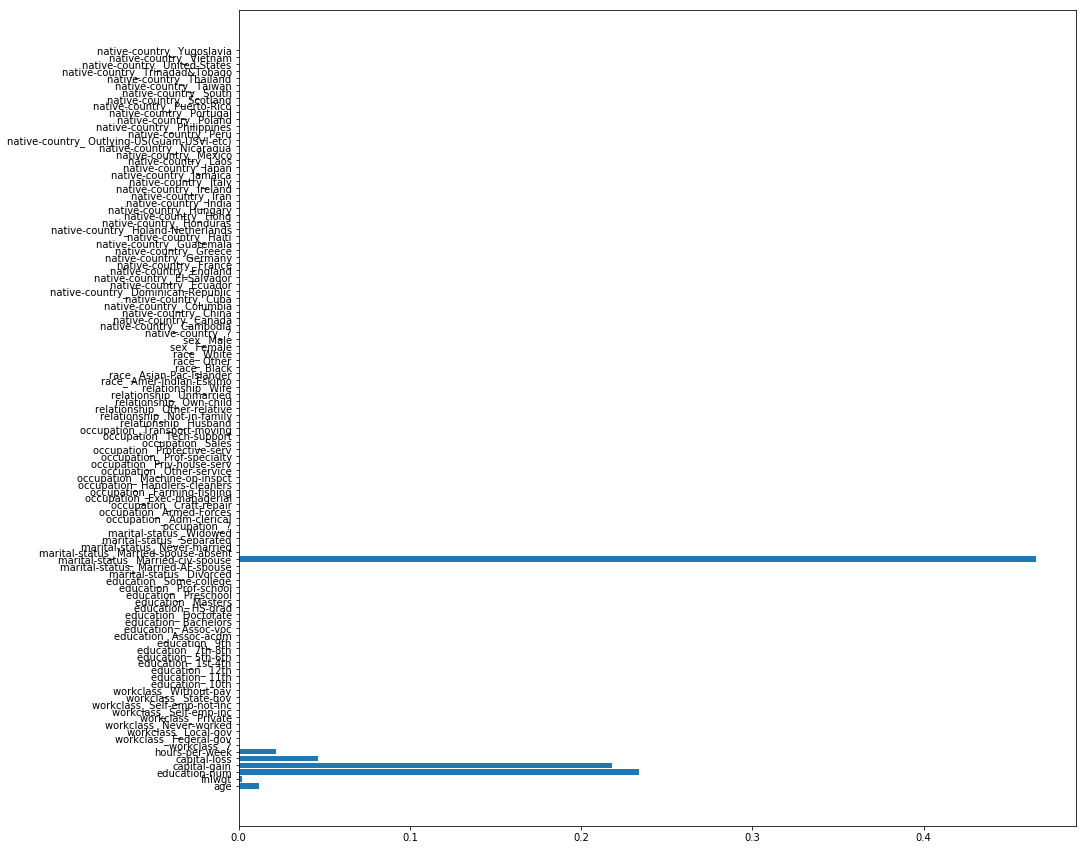

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.barh(X.columns, model.feature_importances_)

In [89]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
model = GradientBoostingClassifier().fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8690457909769356, 0.8712609790553406)

In [86]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=10).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.86299560824299, 0.8571955039616731)

In [83]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,50)).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.9097079328030466, 0.8318285117621768)